# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Empty lists for dataframe 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#counter for print log
record = 1
of = 1

# Log file print statement
print(f"Beginning data retrieval.")
print("-"*64)

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{base_url}appid={weather_api_key}&q={city}&units=imperial").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set {of} | {city_record}") 
        
    except:
        print("City not found. Skipping...")
        
        record = record-1
    
    if record <50:
        record= record + 1
    else:
        record = 1
        of += 1
       
    # wait 1 second to not exceed API call limit
#     time.sleep(1.01)
    
    
    print("-"*64)

print(f"End of data retrieval.")

Beginning data retrieval.
----------------------------------------------------------------
Processing Record 1 of Set 1 | Cape Town
----------------------------------------------------------------
Processing Record 2 of Set 1 | Ushuaia
----------------------------------------------------------------
Processing Record 3 of Set 1 | Kaitangata
----------------------------------------------------------------
Processing Record 4 of Set 1 | Tura
----------------------------------------------------------------
Processing Record 5 of Set 1 | Half Moon Bay
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 6 of Set 1 | Torbay
----------------------------------------------------------------
Processing Record 7 of Set 1 | Qaanaaq
----------------------------------------------------------------
Processing Record 8 of Set 1 | Jamestown
----------------------------------------

Processing Record 24 of Set 2 | Khatanga
----------------------------------------------------------------
Processing Record 25 of Set 2 | Santa Maria
----------------------------------------------------------------
Processing Record 26 of Set 2 | Tucuruí
----------------------------------------------------------------
Processing Record 27 of Set 2 | Tezu
----------------------------------------------------------------
Processing Record 28 of Set 2 | Longyearbyen
----------------------------------------------------------------
Processing Record 29 of Set 2 | Hilo
----------------------------------------------------------------
Processing Record 30 of Set 2 | Fort Nelson
----------------------------------------------------------------
Processing Record 31 of Set 2 | Hasaki
----------------------------------------------------------------
Processing Record 32 of Set 2 | Lebu
----------------------------------------------------------------
Processing Record 33 of Set 2 | Nanortalik
--------

Processing Record 47 of Set 3 | Dingle
----------------------------------------------------------------
Processing Record 48 of Set 3 | Olinda
----------------------------------------------------------------
Processing Record 49 of Set 3 | Nan
----------------------------------------------------------------
Processing Record 50 of Set 3 | Zhangaözen
----------------------------------------------------------------
Processing Record 1 of Set 4 | La Macarena
----------------------------------------------------------------
Processing Record 2 of Set 4 | Clyde River
----------------------------------------------------------------
Processing Record 3 of Set 4 | Bonavista
----------------------------------------------------------------
Processing Record 4 of Set 4 | Umluj
----------------------------------------------------------------
Processing Record 5 of Set 4 | Vila Franca do Campo
----------------------------------------------------------------
Processing Record 6 of Set 4 | Severo-Kuri

City not found. Skipping...
----------------------------------------------------------------
Processing Record 19 of Set 5 | Araouane
----------------------------------------------------------------
Processing Record 20 of Set 5 | Nassau
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 21 of Set 5 | Sobolevo
----------------------------------------------------------------
Processing Record 22 of Set 5 | Derzhavīnsk
----------------------------------------------------------------
Processing Record 23 of Set 5 | Bubaque
----------------------------------------------------------------
Processing Record 24 of Set 5 | Prince Albert
----------------------------------------------------------------
Processing Record 25 of Set 5 | Zhigansk
----------------------------------------------------------------
City not found. Skipping...
---------------------------------------

Processing Record 39 of Set 6 | Chipinge
----------------------------------------------------------------
Processing Record 40 of Set 6 | Solotvyn
----------------------------------------------------------------
Processing Record 41 of Set 6 | Namatanai
----------------------------------------------------------------
Processing Record 42 of Set 6 | Xichang
----------------------------------------------------------------
Processing Record 43 of Set 6 | Eyl
----------------------------------------------------------------
Processing Record 44 of Set 6 | Ağdam
----------------------------------------------------------------
Processing Record 45 of Set 6 | Kununurra
----------------------------------------------------------------
Processing Record 46 of Set 6 | Mandera
----------------------------------------------------------------
Processing Record 47 of Set 6 | Hambantota
----------------------------------------------------------------
Processing Record 48 of Set 6 | Richards Bay
-------

Processing Record 10 of Set 8 | Fortuna
----------------------------------------------------------------
Processing Record 11 of Set 8 | Shuangcheng
----------------------------------------------------------------
Processing Record 12 of Set 8 | Ahipara
----------------------------------------------------------------
Processing Record 13 of Set 8 | Caravelas
----------------------------------------------------------------
Processing Record 14 of Set 8 | Santa Cruz del Norte
----------------------------------------------------------------
Processing Record 15 of Set 8 | Hillsboro
----------------------------------------------------------------
Processing Record 16 of Set 8 | Balkány
----------------------------------------------------------------
Processing Record 17 of Set 8 | Guerrero Negro
----------------------------------------------------------------
Processing Record 18 of Set 8 | Hong Kong
----------------------------------------------------------------
Processing Record 19 of S

Processing Record 31 of Set 9 | Luwingu
----------------------------------------------------------------
Processing Record 32 of Set 9 | Kiama
----------------------------------------------------------------
Processing Record 33 of Set 9 | Sitka
----------------------------------------------------------------
Processing Record 34 of Set 9 | Mandalgovi
----------------------------------------------------------------
Processing Record 35 of Set 9 | Kensington
----------------------------------------------------------------
Processing Record 36 of Set 9 | Pointe Michel
----------------------------------------------------------------
Processing Record 37 of Set 9 | Kholm
----------------------------------------------------------------
Processing Record 38 of Set 9 | Lompoc
----------------------------------------------------------------
Processing Record 39 of Set 9 | Los Llanos de Aridane
----------------------------------------------------------------
Processing Record 40 of Set 9 | Pahr

Processing Record 2 of Set 11 | Catherinas Lust
----------------------------------------------------------------
Processing Record 3 of Set 11 | Omsukchan
----------------------------------------------------------------
Processing Record 4 of Set 11 | Nālūt
----------------------------------------------------------------
Processing Record 5 of Set 11 | Ishigaki
----------------------------------------------------------------
Processing Record 6 of Set 11 | Lorengau
----------------------------------------------------------------
Processing Record 7 of Set 11 | Reading
----------------------------------------------------------------
Processing Record 8 of Set 11 | Okato
----------------------------------------------------------------
Processing Record 9 of Set 11 | Bandar-e Lengeh
----------------------------------------------------------------
Processing Record 10 of Set 11 | Carndonagh
----------------------------------------------------------------
Processing Record 11 of Set 11 | Ve

Processing Record 24 of Set 12 | Zalari
----------------------------------------------------------------
Processing Record 25 of Set 12 | Chumikan
----------------------------------------------------------------
Processing Record 26 of Set 12 | Kibala
----------------------------------------------------------------
Processing Record 27 of Set 12 | Terney
----------------------------------------------------------------
Processing Record 28 of Set 12 | Lashio
----------------------------------------------------------------
End of data retrieval.


In [16]:
# put lists into dictionary
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#make dataframe
weather_data = pd.DataFrame(weather_dict)

# Save data frame to CSV
weather_data.to_csv(output_data_file)


# verify each column has same count
print(weather_data.count())

# Display data frame head 
weather_data.head()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,42,ZA,1629846220,88,-33.9258,18.4232,57.88,1.99
1,Ushuaia,94,AR,1629846033,85,-54.8000,-68.3000,31.73,4.05
2,Kaitangata,22,NZ,1629846351,65,-46.2817,169.8464,56.55,6.31
3,Tura,100,IN,1629846636,98,25.5198,90.2201,73.81,6.13
4,Half Moon Bay,20,US,1629846443,70,37.4636,-122.4286,85.91,1.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#no countries with more than 100% humidity
humid_drop = weather_data.loc[weather_data["Humidity"]>100]
humid_drop

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [19]:
# Get the indices of cities that have humidity over 100%.
#If there are, make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

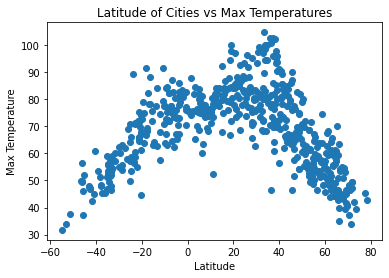

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude of Cities vs Max Temperatures")
plt.show()

## Latitude vs. Humidity Plot

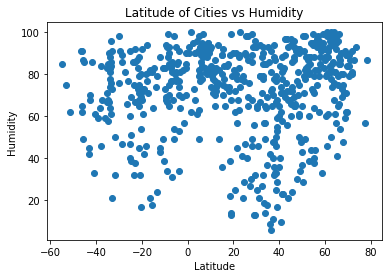

In [23]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude of Cities vs Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

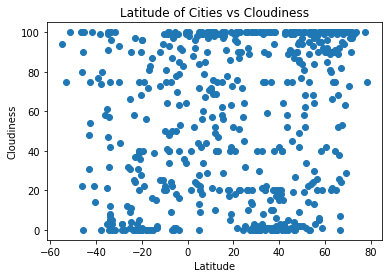

In [24]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude of Cities vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

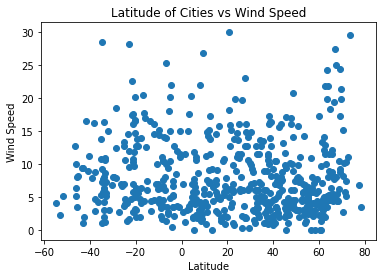

In [25]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude of Cities vs Wind Speed")
plt.show()

## Linear Regression

In [26]:
 north_h = weather_data.loc[weather_data["Lat"]>=0]
 south_h = weather_data.loc[weather_data["Lat"]<0]

In [27]:
#define function to generate each line regression
def line_reg(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.6801782135869453


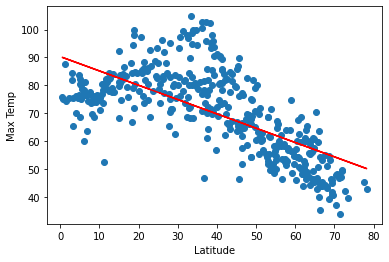

In [29]:
x= north_h["Lat"]
y=north_h["Max Temp"]
line_reg(x, y, "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.8360092710006413


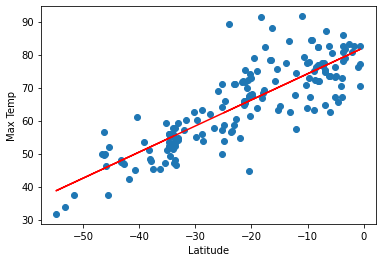

In [31]:
x= south_h["Lat"]
y=south_h["Max Temp"]
line_reg(x, y, "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.05529374295177537


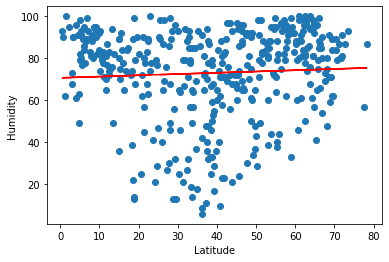

In [32]:
x= north_h["Lat"]
y=north_h["Humidity"]
line_reg(x, y, "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.058910905362810614


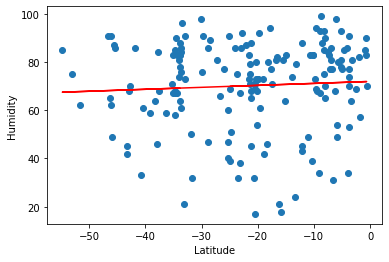

In [33]:
x= south_h["Lat"]
y=south_h["Humidity"]
line_reg(x, y, "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.16457036729398541


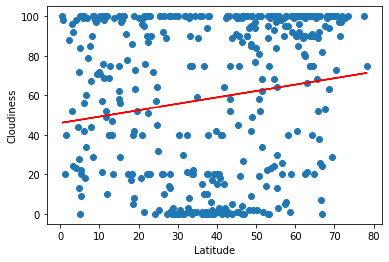

In [34]:
x= north_h["Lat"]
y=north_h["Cloudiness"]
line_reg(x, y, "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.030283196076657855


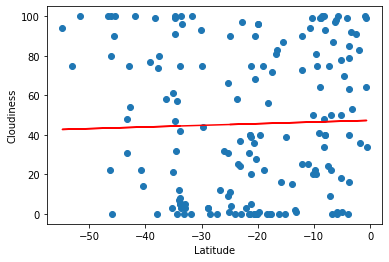

In [35]:
x= south_h["Lat"]
y=south_h["Cloudiness"]
line_reg(x, y, "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.04450061492517095


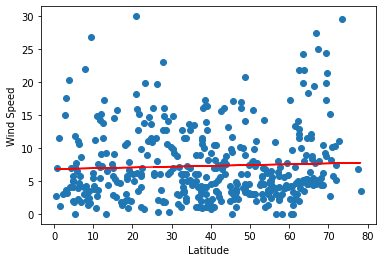

In [36]:
x= north_h["Lat"]
y=north_h["Wind Speed"]
line_reg(x, y, "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.030283196076657855


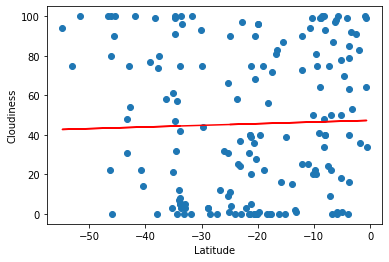

In [37]:
x= south_h["Lat"]
y=south_h["Cloudiness"]
line_reg(x, y, "Cloudiness")